In [1]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/gabriels3t/Classificacao-de-Jatos-utilizando-o-dataset-hls4ml-lhc-com-MLP-e-CNN--trabalho-.git
    import os as os
    os.chdir('./Classificacao-de-Jatos-utilizando-o-dataset-hls4ml-lhc-com-MLP-e-CNN--trabalho-')

Cloning into 'Classificacao-de-Jatos-utilizando-o-dataset-hls4ml-lhc-com-MLP-e-CNN--trabalho-'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 46 (delta 2), reused 10 (delta 1), pack-reused 34 (from 1)
Receiving objects: 100% (46/46), 603.85 MiB | 4.13 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (34/34), done.
Filtering content: 100% (2/2), 428.01 MiB | 41.85 MiB/s, done.


In [2]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
treino = torch.load('data/treino_particle.pt',weights_only=False)
teste = torch.load('data/teste_particle.pt',weights_only=False)

In [4]:
coluna=['$p_{x}$ [Gev]', '$p_{y}$ [Gev]', '$p_{z}$ [Gev]', '$E$ [Gev]',
                'Relative~$E$ [Gev]', '$p_{T}$ [GeV]', 'Relative $p_{T}$ [GeV]',
                 '$\eta$', 'Relative $\eta$', 'Rotated $\eta$', '$\phi$', 'Relative $\phi$',
                'Rotated $\phi$', '$\\Delta R$', r'cos $\theta$', r'Relative cos $\theta$','tipo']

<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:3: SyntaxWarning: invalid escape sequence '\p'
<>:4: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-224036028.py:3: SyntaxWarning: invalid escape sequence '\e'
  '$\eta$', 'Relative $\eta$', 'Rotated $\eta$', '$\phi$', 'Relative $\phi$',
/tmp/ipython-input-224036028.py:3: SyntaxWarning: invalid escape sequence '\e'
  '$\eta$', 'Relative $\eta$', 'Rotated $\eta$', '$\phi$', 'Relative $\phi$',
/tmp/ipython-input-224036028.py:3: SyntaxWarning: invalid escape sequence '\e'
  '$\et

In [24]:
treino_numpy = treino.numpy()
teste_numpy = teste.numpy()

treino_df = pd.DataFrame(treino_numpy,columns=coluna)
teste_df = pd.DataFrame(teste_numpy,columns=coluna)
#treino_df = treino_df.drop(columns=['tipo'])
matrix = treino_df.corr(method='pearson')

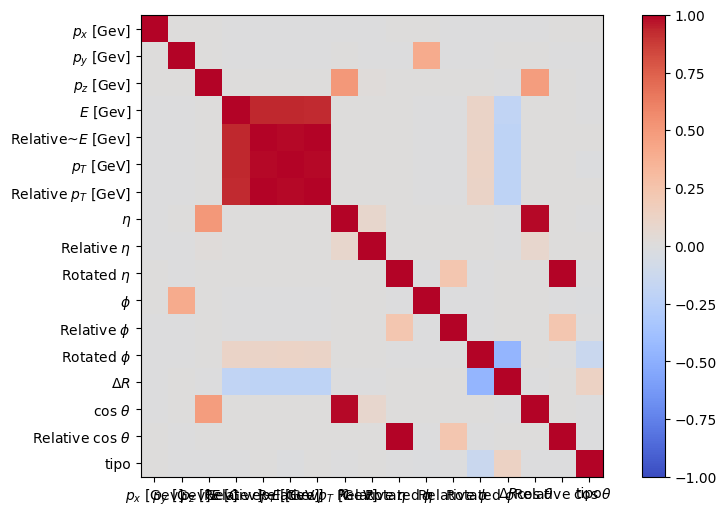

In [25]:
plt.figure(figsize=(10, 6))
plt.imshow(matrix, cmap = 'coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(matrix.columns)), matrix.columns)
plt.yticks(range(len(matrix.columns)), matrix.columns)
plt.show()

Após a análise da matriz de correlação, observou-se que as variáveis $E$, Relative $E$, $p_T$ e Relative $p_T$ apresentam forte correlação entre si, o que introduz redundância de informação no modelo. O mesmo ocorre com Relative cos $\theta$, Rotated $\eta$ e $\eta$, além da correlação entre $\eta$ e cos $\theta$.

Diante disso, optou-se por selecionar apenas um representante de cada grupo de variáveis fortemente correlacionadas, resultando na escolha de $p_T$, $\eta$ e Rotated $\eta$.
Adicionalmente, as variáveis $p_x$ e $p_y$ também foram descartadas, pois são redundantes por definição: podem ser completamente determinadas a partir de $p_T$, já que:

$p_T \sqrt{p_x^2+p_y^2}$

In [26]:
treino_df_arrumado = treino_df.drop(columns=['$p_{x}$ [Gev]', '$p_{y}$ [Gev]','$E$ [Gev]','Relative~$E$ [Gev]','Relative $p_{T}$ [GeV]','Relative $\eta$','Relative $\phi$',r'Relative cos $\theta$',r'cos $\theta$'])
teste_df_arrumado = teste_df.drop(columns=['$p_{x}$ [Gev]', '$p_{y}$ [Gev]','$E$ [Gev]','Relative~$E$ [Gev]','Relative $p_{T}$ [GeV]','Relative $\eta$','Relative $\phi$',r'Relative cos $\theta$',r'cos $\theta$'])

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\e'
<>:2: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-1262309337.py:1: SyntaxWarning: invalid escape sequence '\e'
  treino_df_arrumado = treino_df.drop(columns=['$p_{x}$ [Gev]', '$p_{y}$ [Gev]','$E$ [Gev]','Relative~$E$ [Gev]','Relative $p_{T}$ [GeV]','Relative $\eta$','Relative $\phi$',r'Relative cos $\theta$',r'cos $\theta$'])
/tmp/ipython-input-1262309337.py:1: SyntaxWarning: invalid escape sequence '\p'
  treino_df_arrumado = treino_df.drop(columns=['$p_{x}$ [Gev]', '$p_{y}$ [Gev]','$E$ [Gev]','Relative~$E$ [Gev]','Relative $p_{T}$ [GeV]','Relative $\eta$','Relative $\phi$',r'Relative cos $\theta$',r'cos $\theta$'])
/tmp/i

In [27]:
treino_df_arrumado
matrix = treino_df_arrumado.corr(method='pearson')

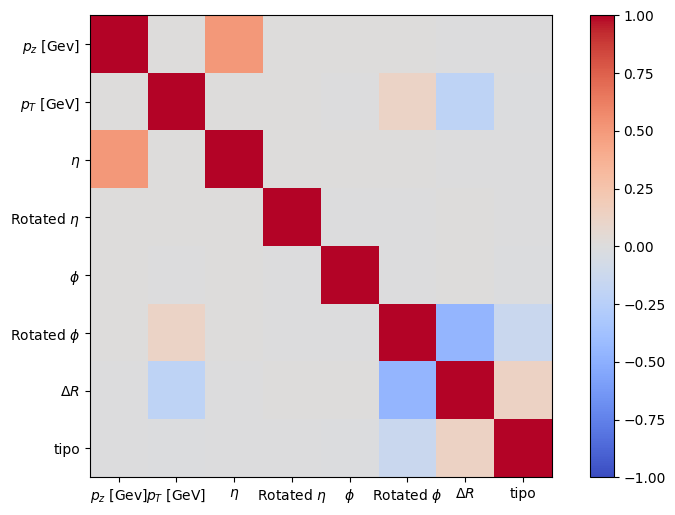

In [28]:
plt.figure(figsize=(10, 6))
plt.imshow(matrix, cmap = 'coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(matrix.columns)), matrix.columns)
plt.yticks(range(len(matrix.columns)), matrix.columns)
plt.show()

In [29]:
teste_df_arrumado.head()

,$p_{z}$ [Gev],$p_{T}$ [GeV],$\eta$,Rotated $\eta$,$\phi$,Rotated $\phi$,$\Delta R$,tipo
0,-32.292679,86.525902,-0.365052,-0.000000e+00,0.187833,0.000000,0.081926,0.0
1,-28.452286,73.438774,-0.378338,-3.680827e-15,0.352104,-0.164802,0.086874,0.0
2,-23.768076,58.098759,-0.398469,-2.040897e-02,0.347766,-0.162088,0.082265,0.0
3,-23.501436,57.977833,-0.395000,-1.795993e-02,0.335170,-0.149259,0.069402,0.0
4,-20.169672,55.639923,-0.355000,9.796999e-03,0.185094,0.003544,0.087997,0.0


In [30]:
treino_df_arrumado.head()

,$p_{z}$ [Gev],$p_{T}$ [GeV],$\eta$,Rotated $\eta$,$\phi$,Rotated $\phi$,$\Delta R$,tipo
0,75.105598,403.669617,0.185000,-0.000000,-0.245124,0.000000,0.006959,0.0
1,25.297071,137.847626,0.182500,-0.006112,-0.237621,-0.005019,0.009463,0.0
2,9.730256,55.318676,0.175000,0.002193,-0.265135,0.022262,0.028418,0.0
3,9.119686,51.982910,0.174549,-0.011119,-0.240856,0.001954,0.016519,0.0
4,8.759169,46.442963,0.187500,0.006113,-0.252628,0.005020,0.011507,0.0


In [31]:
treino_df_arrumado.to_csv('data/treino_preprocessado.csv',index=False)
teste_df_arrumado.to_csv('data/teste_preprocessado.csv',index=False)

# Normalizando e dividindo Treino Validação e teste

In [32]:
df = pd.read_csv('data/treino_preprocessado.csv')
df.head()

,$p_{z}$ [Gev],$p_{T}$ [GeV],$\eta$,Rotated $\eta$,$\phi$,Rotated $\phi$,$\Delta R$,tipo
0,75.105600,403.669620,0.185000,-0.000000,-0.245124,0.000000,0.006959,0.0
1,25.297071,137.847630,0.182500,-0.006112,-0.237621,-0.005019,0.009463,0.0
2,9.730256,55.318676,0.175000,0.002193,-0.265135,0.022262,0.028418,0.0
3,9.119686,51.982910,0.174549,-0.011119,-0.240856,0.001954,0.016519,0.0
4,8.759169,46.442963,0.187500,0.006113,-0.252628,0.005020,0.011507,0.0
